# Dimensionality reduction: PCA

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

**Dimensionality reduction** is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with). Dimensionality reduction is common in fields that deal with large numbers of observations and/or large numbers of variables, such as signal processing, speech recognition, neuroinformatics, and bioinformatics.

# PCA

* Statistical interpretation of SVD (Singular value decomposition).

* Capture the direction of maximum variance.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

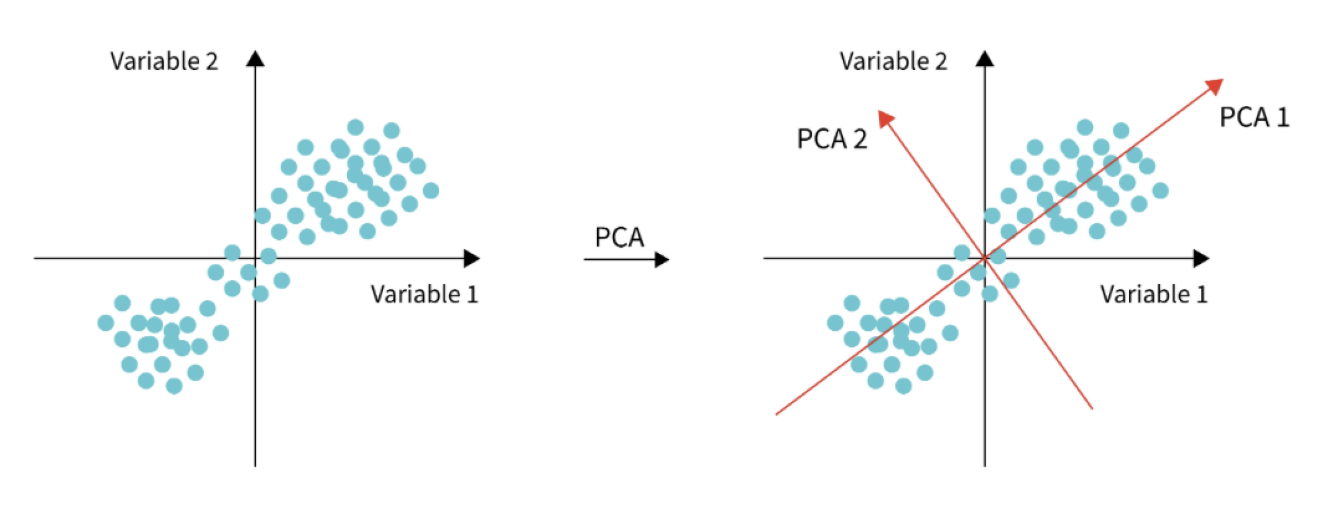

In [4]:
display_img('PCA.png', 17, 17)

Asumme $ m < n $.

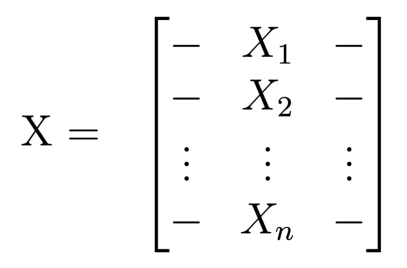

In [5]:
display_img('1.png', 5, 5)

We are considering $n$ observations with $m$ features. $ X \in \mathbb{R}^{n \times m} $

### Steps

**1. Compute the mean row:** $ \bar{x} \in \mathbb{R}^{1 \times m} $

**2. Compute the mean matrix:** $ \bar{X} = 1 \cdot \bar{x} \in \mathbb{R}^{n \times m} $ with $ 1 \in \mathbb{R}^{n \times 1} $

**3. Substract the mean:** $ B = X - \bar{X} \in \mathbb{R}^{n \times m} $

**4. Compute the covariance matrix:** $ C = B^{T} \cdot B \in \mathbb{R}^{m \times m} $

**5. Compute the eigenvalues and eigenvectors:**

The eigenvalues of $ C $ are the singular values of $ B $. We are considering the normalized eigenvectors and the eigenvalues ordered in ascend.

We have:

$ C \cdot v_1 = \lambda_1 \cdot v_1 $

$ \vdots $

$ C \cdot v_m = \lambda_m \cdot v_m $

We are going to define $ V \in \mathbb{R}^{m \times m} $ and $ D \in \mathbb{R}^{m \times m} $.

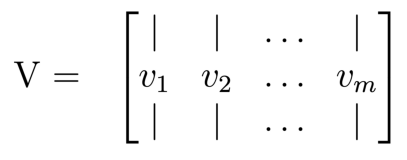

In [6]:
display_img('V.png', 5, 5)

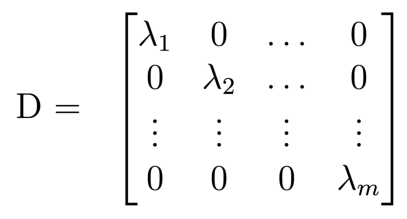

In [7]:
display_img('D.png', 5, 5)

$ C \cdot V = C \cdot [v_1, v_2, \dots, v_m] = [C \cdot v_1, C \cdot v_2, \dots, C \cdot v_m] $

$ V \cdot D = V \cdot [\lambda_1 \cdot e_1, \lambda_2 \cdot e_2, \dots, \lambda_m \cdot e_m] = [\lambda_1 \cdot V \cdot e_1, \lambda_2 \cdot V \cdot e_2, \dots, \lambda_m \cdot V \cdot e_m] = [\lambda_1 \cdot v_1, \lambda_2 \cdot v_2, \dots, \lambda_m \cdot v_m] $

On this way if we define:

$ \boxed{C \cdot V = V \cdot D} $ 

then:

$ C \cdot v_1 = \lambda_1 \cdot v_1 $

$ \vdots $

$ C \cdot v_m = \lambda_m \cdot v_m $

Thus we can check the equation is valid.

**6. We define the Principal Components:**

$ \boxed{T = B \cdot V} $ where $ T \in \mathbb{R}^{n \times m} $

Note if $ B = U \cdot \Sigma \cdot V^T  \Rightarrow T = B \cdot V = U \cdot \Sigma \cdot V^T \cdot V = U \cdot \Sigma $ because $ V $ are orthonormal.

**7. Choose r Principal Components:**

We are to consider only the first $ r $ columns of $ T $. It's very important see that the percentage of variance explained by the $ r $ principal components can be computed on this way:

$ a_r = \cfrac{\sum_{i = 1}^r \lambda_i}{\sum_{i = 1}^m \lambda_i} $

# Example

**a. Implemented by us**

In [8]:
start = time.time()

In [9]:
import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA

In [10]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [11]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [12]:
X.mean(axis = 0)

array([0., 0.])

In [13]:
B = X - X.mean(axis = 0)

In [14]:
C = np.dot(B.transpose(), B)

In [15]:
C

array([[28., 18.],
       [18., 12.]])

In [16]:
eigenvalues, eigenvectors = LA.eig(C)

In [17]:
T = np.dot(B, eigenvectors)

In [18]:
T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

In [19]:
part_var_exp = eigenvalues/eigenvalues.sum()

In [20]:
part_var_exp

array([0.99244289, 0.00755711])

In [21]:
var_exp = []

for i in range(len(part_var_exp)):

    var_exp.append(round(part_var_exp[0:i + 1].sum()*100, 2))

In [22]:
var_exp

[99.24, 100.0]

**Comments:** If we use only the first component we have the $ 99.24 \% $ of the variance explained.

**b. Using sklearn**

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 2, svd_solver = 'full')

In [25]:
pca = pca.fit(X)

In [26]:
T = pca.transform(X)

In [27]:
T

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [28]:
part_var_exp_sk = pca.explained_variance_ratio_

In [29]:
part_var_exp_sk

array([0.99244289, 0.00755711])

In [30]:
var_exp_sk = []

for i in range(len(part_var_exp_sk)):

    var_exp_sk.append(round(part_var_exp_sk[0:i + 1].sum()*100, 2))

In [31]:
var_exp_sk

[99.24, 100.0]

**Comments:** If we use only the first component we have the $ 99.24 \% $ of the variance explained.

**c. Plots**

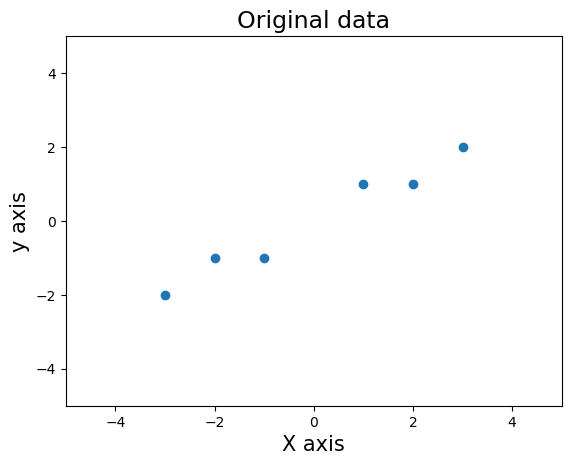

In [32]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Original data', fontsize = 17)
plt.xlabel('X axis', fontsize = 15)
plt.ylabel('y axis', fontsize = 15)
plt.show()

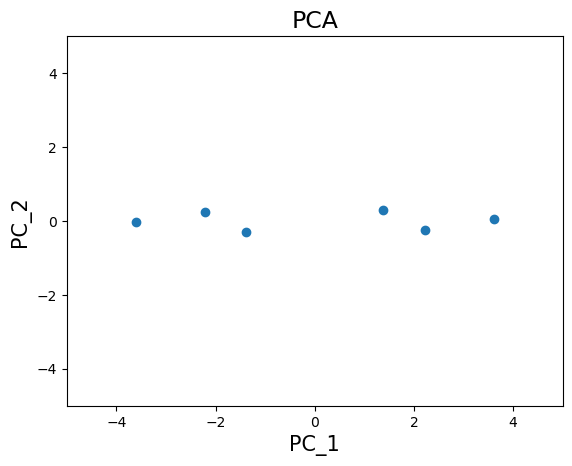

In [33]:
plt.scatter(T[:, 0], T[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('PCA', fontsize = 17)
plt.xlabel('PC_1', fontsize = 15)
plt.ylabel('PC_2', fontsize = 15)
plt.show()

### Time of execution

In [34]:
end = time.time()

In [35]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
